Enter the first stock ticker: MSFT
Enter the second stock ticker: AAPL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


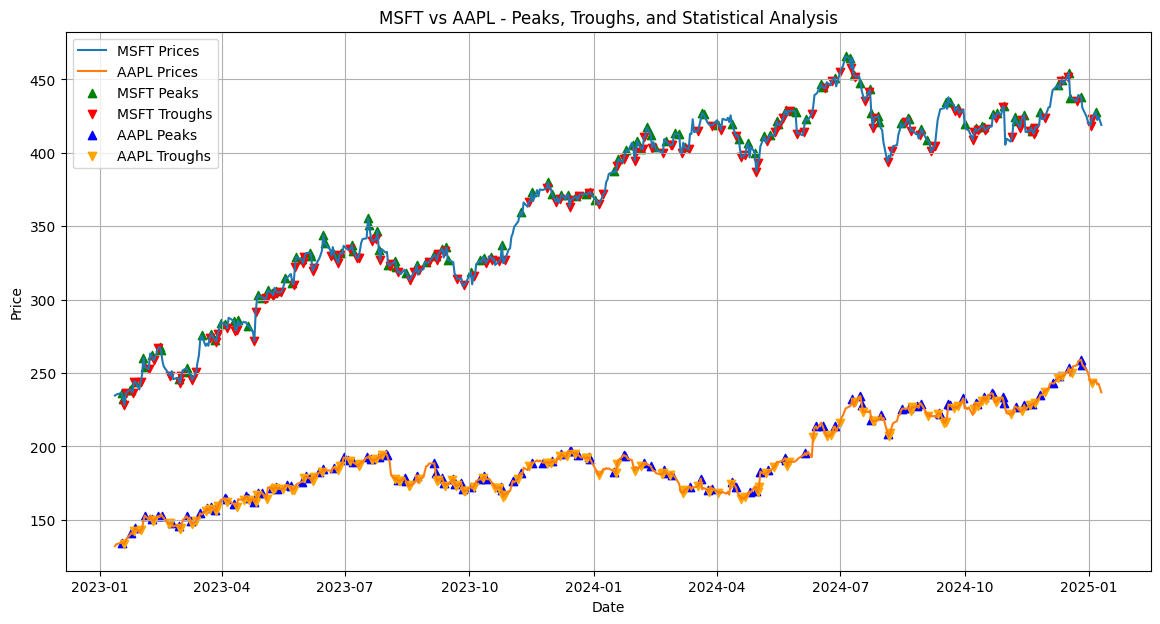

Correlation between MSFT and AAPL: 0.7909
P-value: 0.0000
Number of Peaks in MSFT: 134 | Number of Peaks in AAPL: 126
Number of Troughs in MSFT: 133 | Number of Troughs in AAPL: 123


In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Fetching stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Finding peaks and troughs
def find_peaks_and_troughs(prices):
    diff = prices.diff()
    peaks = prices[(diff.shift(1) > 0) & (diff.shift(-1) < 0)]
    troughs = prices[(diff.shift(1) < 0) & (diff.shift(-1) > 0)]
    return peaks, troughs

# Analyzing relationships
def analyze_relationship(data1, data2):
    correlation, p_value = pearsonr(data1, data2)
    return correlation, p_value

# Analysis function
def analyze_stocks(ticker1, ticker2):
    end_date = pd.Timestamp.today()
    start_date = end_date - pd.DateOffset(months=24)

    stock1 = fetch_stock_data(ticker1, start_date, end_date)
    stock2 = fetch_stock_data(ticker2, start_date, end_date)

    combined = pd.concat([stock1, stock2], axis=1, join='inner')
    combined.columns = [ticker1, ticker2]

    peaks1, troughs1 = find_peaks_and_troughs(combined[ticker1])
    peaks2, troughs2 = find_peaks_and_troughs(combined[ticker2])

    correlation, p_value = analyze_relationship(combined[ticker1], combined[ticker2])

    plt.figure(figsize=(14, 7))
    plt.plot(combined.index, combined[ticker1], label=f'{ticker1} Prices')
    plt.plot(combined.index, combined[ticker2], label=f'{ticker2} Prices')
    plt.scatter(peaks1.index, peaks1, color='green', label=f'{ticker1} Peaks', marker='^')
    plt.scatter(troughs1.index, troughs1, color='red', label=f'{ticker1} Troughs', marker='v')
    plt.scatter(peaks2.index, peaks2, color='blue', label=f'{ticker2} Peaks', marker='^')
    plt.scatter(troughs2.index, troughs2, color='orange', label=f'{ticker2} Troughs', marker='v')
    plt.title(f'{ticker1} vs {ticker2} - Peaks, Troughs, and Statistical Analysis')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Results
    print(f'Correlation between {ticker1} and {ticker2}: {correlation:.4f}')
    print(f'P-value: {p_value:.4f}')
    print(f'Number of Peaks in {ticker1}: {len(peaks1)} | Number of Peaks in {ticker2}: {len(peaks2)}')
    print(f'Number of Troughs in {ticker1}: {len(troughs1)} | Number of Troughs in {ticker2}: {len(troughs2)}')

# Running program
ticker1 = input("Enter the first stock ticker: ")
ticker2 = input("Enter the second stock ticker: ")
analyze_stocks(ticker1, ticker2)
